In [ ]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

ModuleNotFoundError: No module named 'matplotlib'

In [ ]:
sales=pd.read_excel("coffee shop sales.xlsx")
sales

In [ ]:
# Making one month column of month names
# Insert syntax is sales.insert(index,column_name,value)

sales.insert(2,"month",sales["transaction_date"].dt.strftime("%B"))
sales.head()

In [ ]:
#to check number of rows and columns 
print(sales.shape)
print(f"number of rows : {sales.shape[0]} and number  of columns :{ sales.shape[1]}")
#the duplicated values 
print(f"number of duplicates:{sales.duplicated().sum}")

In [ ]:
#to view the datatypes and top rows
sales.head()
sales.dtypes

In [ ]:
#to convert the data types from one to another
sales["transaction-time"]=pd.to_datetime(sales["transaction_time"],format="%H:%M:%S")
sales.dtypes

In [ ]:
# calculate the total sales
sales["total_sale"] = sales["unit_price"]*sales["transaction_qty"]
sales.head()

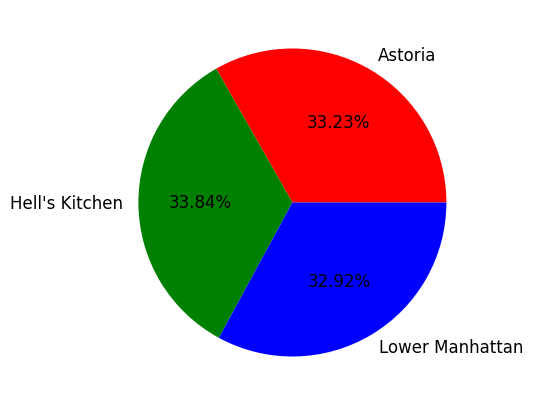

In [54]:
# Plot the graph finding total sales as per locations 
store_sales = pd.DataFrame(sales.groupby("store_location")["total_sale"].sum()).reset_index()
store_sales

# Plot the pie chart with matplotlib
plt.figure(figsize=(10,5))
plt.pie(store_sales["total_sale"],
        labels=store_sales["store_location"],
        autopct="%1.2f%%",
        colors=['red','green','blue'],
        textprops={'fontsize':12})
plt.show()

In [53]:
sales["store_location"].unique()

array(['Lower Manhattan', "Hell's Kitchen", 'Astoria'], dtype=object)

In [59]:
location=input("Enter the location('Lower Manhattan ,Hell's kitchen,Astoria):")

# Trend_sales=sales[sales["transaction_date"]dt.month==int(month)]
sales[sales[sales["transaction_date"]==str]]

,transaction_id,transaction_date,month,transaction_time,transaction_qty,store_id,store_location,product_id,unit_price,product_category,product_type,product_detail,transaction-time,total_sale
0,NaN,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaT,NaN
1,NaN,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaT,NaN
2,NaN,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaT,NaN
3,NaN,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaT,NaN
4,NaN,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaT,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
149111,NaN,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaT,NaN
149112,NaN,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaT,NaN
149113,NaN,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaT,NaN
149114,NaN,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaT,NaN


In [61]:
sales.head(1)

,transaction_id,transaction_date,month,transaction_time,transaction_qty,store_id,store_location,product_id,unit_price,product_category,product_type,product_detail,transaction-time,total_sale
0,1,2023-01-01,January,07:06:11,2,5,Lower Manhattan,32,3.0,Coffee,Gourmet brewed coffee,Ethiopia Rg,1900-01-01 07:06:11,6.0


['Coffee' 'Tea' 'Drinking Chocolate' 'Bakery' 'Flavours' 'Loose Tea'
 'Coffee beans' 'Packaged Chocolate' 'Branded']
   transaction_date  total_sale
0        2023-04-01     3699.90
1        2023-04-02     3575.85
2        2023-04-03     3604.95
3        2023-04-04     3327.30
4        2023-04-05     3552.70
5        2023-04-06     3250.20
6        2023-04-07     3682.80
7        2023-04-08     4573.06
8        2023-04-09     4088.88
9        2023-04-10     4220.30
10       2023-04-11     3852.86
11       2023-04-12     4040.18
12       2023-04-13     4114.53
13       2023-04-14     4131.25
14       2023-04-15     4121.79
15       2023-04-16     4500.39
16       2023-04-17     4332.10
17       2023-04-18     4354.07
18       2023-04-19     4318.31
19       2023-04-20     3924.78
20       2023-04-21     4005.38
21       2023-04-22     3961.58
22       2023-04-23     4321.29
23       2023-04-24     4265.45
24       2023-04-25     4255.00
25       2023-04-26     4559.45
26       2023-04-27

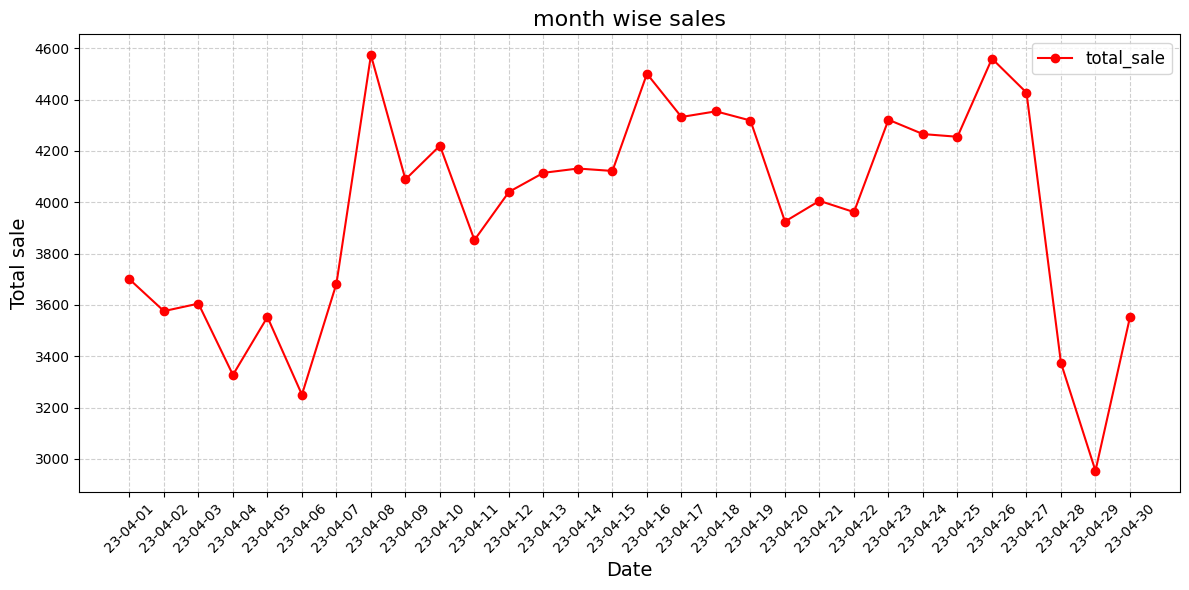

In [65]:
print(sales["product_category"].unique())

# Date-wise sales using input user for month  year
month=input("enter the month:")

# Trend_sales=sales[sales["transaction_date"].dt.month==int(month)]
date_trend_sales=pd.DataFrame(sales[sales["transaction_date"].dt.month==int(month)]
                              .groupby(sales["transaction_date"].dt.date)["total_sale"].sum()
                              ).reset_index()
date_trend_sales["transaction_date"]=pd.to_datetime(date_trend_sales["transaction_date"])
print(date_trend_sales)

# Ploting line chart
plt.figure(figsize=(12,6))
plt.plot(date_trend_sales['transaction_date'],date_trend_sales['total_sale'],marker='o',linestyle='-',color='red',label='total_sale')
plt.title('month wise sales',fontsize=16)
plt.xlabel('Date',fontsize=14)
plt.ylabel('Total sale',fontsize=14)
plt.grid( True, linestyle='--',alpha=0.6)
plt.xticks(date_trend_sales['transaction_date'],labels=date_trend_sales['transaction_date'].dt.strftime('%y-%m-%d'),rotation=45)
plt.legend(fontsize=12)
plt.tight_layout()
plt.show()

In [ ]:
# Making a columns of day of week
# https://docs.python.org/3/library/datetime.html#strftime-and-strptime-behavior

sales.insert(5, "day_of_week", sales["transaction_date"].dt.strftime("%A"))
sales.head()

## **Problem 1**

Question - Write a Python script that prompts the user to enter a month and a store location. Using a dataset containing "transaction_date" and "total_sales", filter the data to calculate total daily sales for the selected month and location. Then, visualize the sales trend using a line chart. Ensuring proper date formatting on the x-axis.**

In [ ]:
# To  find the sales based on the store location and in the specific month
# Datewise sales using input user for month year
month = input("Enter the month, 'January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', 'November', 'December': ")
location = input("Enter the location'Lower Manhattan, Hell's Kitchen, Astoria : ")

# trend_sales = sales[sales["transaction_date"].dt.month == int(month)]
date_trend_sale = pd.DataFrame(sales[(sales["transaction_date"].dt.strftime("%B") == month) & 
                                     (sales["store_location"] == location)]
                                     .groupby(sales["transaction_date"].dt.date)["total_sale"].sum()).reset_index()
date_trend_sale["transaction_date"] = pd.to_datetime(date_trend_sale["transaction_date"])

print(date_trend_sale)


# Ploting Line Chart
plt.figure(figsize=(12,6))
plt.plot(date_trend_sale['transaction_date'], date_trend_sale['total_sale'], marker='o',linestyle='-', color='blue', label='Total Sale')
plt.title(f'{month}sales Trend of Store {location}', fontsize=16)
plt.xlabel('Date', fontsize=14)
plt.ylabel('Total Sale', fontsize=14)
plt.grid(True, linestyle='--', alpha=0.6)
plt.xticks(date_trend_sale['transaction_date'], labels=date_trend_sale['transaction_date'].dt.strftime('%Y-%m-%d'), rotation=45)
plt.legend(fontsize=12)
plt.tight_layout()
plt.show()


## **Problem - 2**


Question - Write a Python Script that prompts the user to enter a month and a product category. Using a dataset with "transaction_date","product_category", and "transaction_qty", filter the data to compute the total quantity sold for each product type within the selected month and category. Visualize the results using a bar chart, ensuring proper labelling and formatting

In [ ]:
month = input("Enter the month (in numbers) : ")
product_category = input("Enter the product_category,'Coffee'/'Tea'/'Drinking Chocolate'/'Bakery'/'Flavours'/'Loose Tea'/'Coffee Beans'/'Package'")

qty_order_pt = pd.DataFrame(sales[sales["transaction_date"].dt.month == int(month) &
                                  (sales["product_category"] == product_category)].groupby("product_type")["transaction_qty"].sum()).reset_index()

qty_order_pt

# Plotting the bar chart
plt.figure(figsize=(12,6))
plt.bar_label(plt.bar(qty_order_pt['product_type'], qty_order_pt['transaction_qty'], color='green', label='Total Sales'))
plt.title(f'{month}sales Trend of Store {product_category}', fontsize=16)
plt.xlabel('Product Type', fontsize=14)
plt.ylabel('Total Sales', fontsize=14)
plt.xticks(rotation=45)
plt.grid(True, linestyle='--', alpha=0.6)
plt.xticks(qty_order_pt['product_type'], labels=qty_order_pt['product_type'], rotation=45)
plt.legend(fontsize=12)
plt.tight_layout()
plt.show()

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

month = input("Enter the month (e.g., 'January', 'February', etc.): ")
location = input("Enter the location (e.g., 'Lower Manhattan', 'Hell's Kitchen', 'Astoria'): ")

# Assuming 'sales' is a DataFrame already defined
sales['day_of_week'] = sales['transaction_date'].dt.day_name()

# Filter by month and location
filtered_sales = sales[(sales["transaction_date"].dt.strftime("%B") == month) & 
                       (sales["store_location"] == location)]

# Group by day of the week and store location
weekly_sales = filtered_sales.groupby(['day_of_week', 'store_location'])['total_sale'].sum().unstack().fillna(0)

print(weekly_sales)

# Plotting Line Chart
plt.figure(figsize=(12,6))
weekly_sales.plot(kind='bar', figsize=(12, 6))
plt.title(f'{month} Sales Trend by Day of the Week in {location}', fontsize=16)
plt.xlabel('Day of the Week', fontsize=14)
plt.ylabel('Total Sale', fontsize=14)
plt.grid(True, linestyle='--', alpha=0.6)
plt.xticks(rotation=45)
plt.legend(title='Store Location', fontsize=12)
plt.tight_layout()
plt.show()

In [ ]:
month = input("Enter the month (e.g., 'January', 'February', etc.): ")
location = input("Enter the location (e.g., 'Lower Manhattan', 'Hell's Kitchen', 'Astoria'): ")

# Assuming 'sales' is a DataFrame already defined
sales['day_of_week'] = sales['transaction_date'].dt.day_name()

# Filter by month and location
filtered_sales = sales[(sales["transaction_date"].dt.strftime("%B") == month) & 
                       (sales["store_location"] == location)]

# Group by day of the week and store location
weekly_sales = filtered_sales.groupby(['day_of_week', 'store_location'])['total_sale'].sum().unstack().fillna(0)

print(weekly_sales)

# Plotting Line Chart
plt.figure(figsize=(12,6))
weekly_sales.plot(kind='bar', figsize=(12, 6))
plt.title(f'{month} Sales Trend by Day of the Week in {location}', fontsize=16)
plt.xlabel('Day of the Week', fontsize=14)
plt.ylabel('Total Sale', fontsize=14)
plt.grid(True, linestyle='--', alpha=0.6)
plt.xticks(rotation=45)
plt.legend(title='Store Location', fontsize=12)
plt.tight_layout()
plt.show()

In [ ]:
month = input("Enter the month (e.g., 'January', 'February', etc.): ")
location = input("Enter the location (e.g., 'Lower Manhattan', 'Hell's Kitchen', 'Astoria'): ")

# Assuming 'sales' is a DataFrame already defined
sales['day_of_week'] = sales['transaction_date'].dt.day_name()
sales['week_part'] = sales['transaction_date'].dt.dayofweek.apply(lambda x: 'Weekend' if x >= 5 else 'Weekday')

# Filter by month and location
filtered_sales = sales[(sales["transaction_date"].dt.strftime("%B") == month) & 
                       (sales["store_location"] == location)]

# Group by week part
week_part_sales = filtered_sales.groupby('week_part')['total_sale'].sum().reset_index()

print(week_part_sales)

# Plotting Bar Chart
plt.figure(figsize=(8, 6))
plt.bar(week_part_sales['week_part'], week_part_sales['total_sale'], color=['blue', 'orange'])
plt.title(f'{month} Sales Comparison: Weekdays vs Weekends in {location}', fontsize=16)
plt.xlabel('Week Part', fontsize=14)
plt.ylabel('Total Sale', fontsize=14)
plt.grid(True, linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()

In [ ]:
month = input("Enter the month (e.g., 'January', 'February', etc.): ")
product = input("Enter the product name: ")

# Assuming 'sales' is a DataFrame already defined
sales['day_of_week'] = sales['transaction_date'].dt.day_name()
sales['week_part'] = sales['transaction_date'].dt.dayofweek.apply(lambda x: 'Weekend' if x >= 5 else 'Weekday')

# Filter by month and product
filtered_sales = sales[(sales["transaction_date"].dt.strftime("%B") == month) & 
                       (sales["product_name"] == product)]

# Group by store location
store_sales = filtered_sales.groupby('store_location')['total_sale'].sum().reset_index()

print(store_sales)

# Plotting Bar Chart
plt.figure(figsize=(12, 6))
plt.bar(store_sales['store_location'], store_sales['total_sale'], color='blue')
plt.title(f'{month} Sales of {product} by Store Location', fontsize=16)
plt.xlabel('Store Location', fontsize=14)
plt.ylabel('Total Sale', fontsize=14)
plt.grid(True, linestyle='--', alpha=0.6)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [ ]:
# What is the trend of coffee vs tea sales over time?

month=input("Enter the month['January','February','March','April','May','June']:")

tea_data=sales[(sales["product_category"]=="Tea")&
               (sales["transaction_date"].dt.strftime("%B")==month)].groupby("transaction_date")["total_sales"].sum().reset_index()
coffee_data=sale[(sales["product_category"]=="Coffee")&
               (sales["transaction_date"].dt.strftime("%B")==month)].groupby("transaction_date")["total_sales"].sum().reset_index()

In [ ]:
m1=input("Enter the month=")
p1=input("Enter the product category=")
p2=input("Enter the product category=")
d1=pd.DataFrame(sales[(sales['transaction_date'].dt.month==int(m1))&(sales["product_category"]==p1)].groupby("product_type")["total_sale"].sum()).reset_index()
d2=pd.DataFrame(sales[(sales['transaction_date'].dt.month==int(m1))&(sales["product_category"]==p2)].groupby("product_type")["total_sale"].sum()).reset_index()
plt.figure(figsize=(15,10))
plt.plot(d1['transaction_date'],d1['total_sale'],
         marker='o',linestyle='-',color='red',label='Total sale')
plt.plot(d2['transaction_date'],d2['total_sales'],
         marker='o',linestyle='-',color='orange',label='Total sale')
plt.title('Month wise sales',fontsize=16)
plt.xlabel('Date',fontsize=14)
plt.ylabel('Total Sale',fontsize=14)
plt.grid(True, linestyle='--',alpha=0.6)
plt.xticks(date_trend_sale['transaction_date'],labels=date_trend_sale['transaction_date'].dt.strftime('%Y-%m-%d'),rotation=90)
plt.legend(fontsize=12)
plt.tight_layout()
plt.show()

In [ ]:
m1=input("Enter the month=")
p1=input("Enter the product category=")
p2=input("Enter the product category=")
d1=pd.DataFrame(sales[(sales['transaction_date'].dt.month==int(m1))&(sales["product_category"]==p1)].groupby("transaction_date")["total_sale"].sum()).reset_index()
d1["transaction_date"]=pd.to_datetime(date_trend_sale["transaction_date"])
d2=pd.DataFrame(sales[(sales['transaction_date'].dt.month==int(m1))&(sales["product_category"]==p2)].groupby("transaction_date")["total_sale"].sum()).reset_index()
d2["transaction_date"]=pd.to_datetime(date_trend_sale["transaction_date"])
plt.figure(figsize=(15,10))
plt.plot(d1['transaction_date'],d1['total_sale'],
         marker='o',linestyle='--',color='red',label='Total sale')
plt.plot(d2['transaction_date'],d2['total_sale'],
         marker='o',linestyle='--',color='orange',label='Total sale')
plt.title('Month wise sales',fontsize=16)
plt.xlabel('Date',fontsize=14)
plt.ylabel('Total Sale',fontsize=14)
plt.grid(True, linestyle='--',alpha=0.6)
plt.xticks(date_trend_sale['transaction_date'],labels=date_trend_sale['transaction_date'].dt.strftime('%Y-%m-%d'),rotation=90)
plt.legend(fontsize=12)
plt.tight_layout()
plt.show()

In [ ]:
m1=input("Enter the month=")
p1=input("Enter the product category=")
p2=input("Enter the product category=")
d1=pd.DataFrame(sales[(sales['transaction_date'].dt.month==int(m1))&(sales["product_category"]==p1)].groupby("transaction_date")["total_sale"].sum()).reset_index()
d1["transaction_date"]=pd.to_datetime(date_trend_sale["transaction_date"])
d2=pd.DataFrame(sales[(sales['transaction_date'].dt.month==int(m1))&(sales["product_category"]==p2)].groupby("transaction_date")["total_sale"].sum()).reset_index()
d2["transaction_date"]=pd.to_datetime(date_trend_sale["transaction_date"])
plt.figure(figsize=(15,10))
plt.plot(d1['transaction_date'],d1['total_sale'],
         marker='o',linestyle='--',color='red',label='Total sale')
plt.plot(d2['transaction_date'],d2['total_sale'],
         marker='o',linestyle='--',color='orange',label='Total sale')
plt.title('Month wise sales',fontsize=16)
plt.xlabel('Date',fontsize=14)
plt.ylabel('Total Sale',fontsize=14)
plt.grid(True, linestyle='--',alpha=0.6)
plt.xticks(date_trend_sale['transaction_date'],labels=date_trend_sale['transaction_date'].dt.strftime('%Y-%m-%d'),rotation=90)
plt.legend(fontsize=12)
plt.tight_layout()
plt.show()